### Objective : 
#### To implement Stochastic Gradient Descent from scratch on Boston Dataset.
    01. Take boston dataset from sklearn
    02. Split input features into matrix X of dimension ( 506 X 12 ) and Standardize.
    03. Split output into vector Y of dimension ( 506 X 1 )
    04. Convert features that are of type Dataframe into matrix.
    05. Initialize the coefficient and intercept by taking a random value as the seed value.
        np.random.rand(X.shape[1]+1)
        np.random.normal(0,1)
    06. Set the number of iterations to 100.
    07. Determine the optimal learning rate by experimentation.
    08. Update function for Coefficients :
        W(j+1) = W(j) - (2r * (|XT|) * (|XW-Y+b(j)|))
        
              where W ==> Weights
                    r ==> LearningRate
                    X ==> Input feature matrix
                    Y ==> Output vector
                    
    09. Update function for Intercept :
        b(j+1) = b(j) - (2r * (|XW-Y+b(j)|))
    10. Loop through iteration.
    11. Compute W(j+1) and assign it to an array of dimension ( 13 X 1 ). Since its a column vector.
    12. Compute b(j+1).
    13. Compute the mean squared error for each iterations.
    14. The occurance with the least error is our optimal weights.

#### Import the Boston dataset from sklearn.

In [1]:
# Install prettytable
import sys
!{sys.executable} -m pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

# Import the boston dataset from sklearn.
from sklearn.datasets import load_boston
boston = load_boston()

  Using cached prettytable-0.7.2.tar.bz2
  Running setup.py bdist_wheel for prettytable: started
  Running setup.py bdist_wheel for prettytable: finished with status 'done'
  Stored in directory: C:\Users\Vijay Joseph\AppData\Local\pip\Cache\wheels\29\73\c9\3e063a66859af18585f8e1439f92dcc27b8c13ae400bb8c89e
Successfully built prettytable


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# print the shape of the dataset.
print(boston.data.shape) # It has 506 rows and 13 columns.

(506, 13)


In [3]:
# A brief about the Boston House Prices dataset.
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# print the feature names.
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [302]:
# Import the numpy module.
import numpy as np

# Extract the input features and the output variable into separate variable arrays.
X = np.array(boston.data)      # Extract input features from dataset.
Y = np.array(boston.target)    # Extract output variable from dataset.
Y = Y.reshape(506,1)

# Print their respective dimensions.
print(X.shape)                # Dimension of input features.
print(Y.shape)                # Dimension of output variable.

#import sklearn.cross_validation.train_test_split
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

# Normalize the input feature matrix.
# Import the Normailizer module.
from sklearn.preprocessing import Normalizer

# Instantiate the Normailizer module.
normalizer = Normalizer()

#Standardize the normailizer on the train and test data.
X_train_stdzd = normalizer.fit_transform(X_train)
X_test_stdzd = normalizer.fit_transform(X_test)

# Print their respective dimensions.
print(X_train_stdzd.shape)    # Dimension of input features.
print(X_test_stdzd.shape)     # Dimension of input features.
print(Y_train.shape)          # Dimension of output variable.
print(Y_test.shape)           # Dimension of output variable.

(506, 13)
(506, 1)
(354, 13)
(152, 13)
(354, 1)
(152, 1)


#### Initialize the weights, intercept, iteration and learning rate.

In [772]:
# Iterations to be used during determining the optimal weights.
itrCount = 100   # initialize the iteration count to 100.

# Rows of data to be considered for SGD.
rowCount = 128 #  Initialize the row count to 128.

# Store weight values during each iteration for retrospective analysis.
wtLog = np.zeros(shape=((itrCount+1),13))         # set its dimension to (100X13)
bInterceptLog = np.zeros(shape=((itrCount+1),1))  # set its dimension to (100X1)

# Store the current weight values of input features, generated during each iteration.
wtFeatures = np.random.normal(0,1,13)  # Initialize it to the standard normal variate.
wtFeatures = wtFeatures.reshape(1,13)  # set its dimension to (1X13)
wtLog[0] = wtFeatures

# Store pctChangeWeights during each iteration for retrospective analysis.
pctChangeWeightsLog = np.zeros(shape=(itrCount,13))  # set its dimension to (100X13)

# Store the gradient vector during each iteration for retro-analysis.
gradVectorLog = np.zeros(shape=(itrCount))  # set its dimension to (100)

# Store shuffleLog during each iteration for retro analysis.
shuffleLog = np.zeros(shape=(itrCount,rowCount),dtype=int)

# Store the intercept value.
bIntercept = np.random.normal(0,1,1)  # Initialize it to the standard normal variate.
bInterceptLog[0] = bIntercept

# Learning rate to be used during each iteration.
learningRate = 0.06 # Found this rate to be the optimal, keep this constant during each iteration.

# Import linear regression model.
from sklearn.linear_model import LinearRegression

# Store weight values during each iteration for retrospective analysis.
wtLogSKLearn = np.zeros(shape=((itrCount+1),13))     # set its dimension to (100X13)
bInterceptLogSKLearn = np.zeros(shape=((itrCount+1),1))  # set its dimension to (100X1)

# List to store the model metric values.
lstMSE        = []
lstMSESKLearn = []
y_hat_SGD     = []
y_hat_SKLrn   = []
y_observed    = []


#### Implement the SGD regressor logic to compute the optimal weight vector (wfFeatures) and the intercept (bIntercept) .

In [773]:
# Start the iteration and loop through one at a time.
for itr in np.arange(itrCount):
    # Shuffle the input features and the output variable.
    shuffle = np.random.randint(0,354,rowCount)

    W  = np.array(wtLog[itr])                             # Assign the weight under consideration.
    W  = W.reshape(1,13)                                  # Reshape to the desired format.
    WT = W.T                                              # Transpose the weight vector.
    XdotWT =  X_train_stdzd[shuffle].dot(WT)              # Compute dot product of data matrix and weight vector.
    Yshuffle = Y_train[shuffle]                           # The output values to consider.    
    XT = X_train_stdzd[shuffle].T                         # Transpose the data matrix.
    error = (XdotWT - Yshuffle + bInterceptLog[(itr)])    # Error.
    XTdotError = XT.dot(error)                            # XTdotError.
    gradVector = ((XTdotError.sum())/rowCount)            # Gradient Vector.
    gradVectorIntercept = ((error.sum())/rowCount)        # Gradient Vector for intercept.

    # Compute the weight vector.
    ComputedWeights = (2) * learningRate * (gradVector)          # Compute 2 * learningrate * gradient_vector  
    FinalComputedWeight = (wtLog[(itr)] - ComputedWeights.T)     # Update the weights.

    # Compute the intercept value.
    ComputedIntercept = (2) * learningRate * (gradVectorIntercept)          # Compute 2*learningRate*(gradient_vector)
    FinalComputedIntercept = (bInterceptLog[(itr)] - ComputedIntercept)     # Update the intercepts.

    # Store the computed weights and intercepts in an array for comparison later.
    wtLog[(itr+1)] = FinalComputedWeight
    bInterceptLog[(itr+1)] = FinalComputedIntercept

    # store the gradient vector
    gradVectorLog[itr] = gradVector

    # Calculate the mean squared error.
    mse = (1/rowCount) * ((Yshuffle -(XdotWT + bInterceptLog[(itr)]))**2).sum()
    lstMSE.append(mse)                                 # Append MSE to the list.           
    y_hat_SGD.append(XdotWT + bInterceptLog[(itr)])    # Append yhat from SGD algo to the list.

###########   SKLearn Implementation ##########################################################################################
    # Linear Regression
    lm = LinearRegression()                 # Initialize the linear regression module.
    lm.fit(X_stdzd[shuffle], Yshuffle)      # fit the model.
    
    # Predict the output
    y_hat = lm.predict(X_stdzd[shuffle])                        # predict the output. 
    mseSKLearn = (1/rowCount) * ((Yshuffle - y_hat)**2).sum()   # compute the mean squared error.
    lstMSESKLearn.append(mseSKLearn)                            # append the mse to the list.
    y_hat_SKLrn.append(y_hat)                                   # append yhat from sklearns model to the list.
    y_observed.append(Yshuffle)                                 # append yObserved from the data matrix to the list.


#### Store the model metrics to a dataframe for analysis.

In [774]:
# Store the model metrics to a dataframe for analysis.
#dfReport_LR_0point05 ==> backup dataframe.

#del dfReport
import pandas as pd                               # Import the pandas module

index = np.arange(itrCount)                       # get the index for the dataframe
dfReport = pd.DataFrame(index=index)              # create an empty dataframe

dfReport['mse_SGD']      = lstMSE                 # add column mse from SGD algorithm.
dfReport['mse_SKLearn']  = lstMSESKLearn          # add column mse from SKlearn algorithm.
dfReport['gradient_SGD'] = gradVectorLog          # add column gradient.
dfReport['Yobserved']    = y_observed             # add column Y observed values.
dfReport['yhat_SGD']     = y_hat_SGD              # add column Yhat from SGD.
dfReport['yhat_SKLearn'] = y_hat_SKLrn            # add column Yhat from SKLearn
dfReport['learningRate'] = learningRate           # add column LearningRate.

# Display the dataframe contents , sort by lowest value of mean squared error.
dfReport.sort_values(by='mse_SGD',ascending=True)

,mse_SGD,mse_SKLearn,gradient_SGD,Yobserved,yhat_SGD,yhat_SKLearn,learningRate
82,51.806172,42.574159,0.760785,"[[9.6], [12.8], [20.3], [15.7], [29.1], [20.2]...","[[20.90171108501842], [22.89624558797056], [22...","[[17.607015008164637], [21.349827725787293], [...",0.06
49,57.098743,46.329532,0.801080,"[[22.4], [34.9], [18.5], [15.7], [30.7], [10.2...","[[23.020956439085552], [23.293744495827763], [...","[[24.454620154065736], [20.44860493063311], [2...",0.06
8,58.808104,51.280583,-0.617037,"[[19.3], [24.7], [27.0], [21.4], [19.4], [31.1...","[[22.095861162594936], [20.78204935791141], [2...","[[23.26719026953306], [22.423808472693977], [2...",0.06
41,59.171342,46.118697,-0.040120,"[[14.9], [20.1], [30.1], [20.1], [20.8], [22.8...","[[22.45727866684936], [22.60790731056539], [22...","[[22.353485535941786], [26.921342532962825], [...",0.06
61,60.057656,47.336917,1.735774,"[[27.1], [15.2], [23.7], [21.7], [20.7], [16.1...","[[23.81175732093927], [23.558355288014532], [2...","[[23.690719420308994], [22.337906555905136], [...",0.06
55,61.666515,46.157925,0.019047,"[[23.6], [36.0], [20.0], [20.9], [25.0], [13.3...","[[22.393156548324683], [23.151791771252274], [...","[[16.392328234207277], [24.9091186356911], [23...",0.06
70,62.284535,40.158791,-0.567726,"[[21.0], [17.4], [37.0], [22.2], [19.9], [17.1...","[[21.484777482468758], [21.978952701057587], [...","[[27.672473446701897], [19.357813681326594], [...",0.06
73,62.471370,49.995483,0.481802,"[[20.8], [24.0], [36.4], [20.8], [32.5], [15.6...","[[22.701399897640215], [22.52686106966089], [2...","[[20.901528013401826], [23.928422408424254], [...",0.06
83,63.146550,44.228593,-0.493748,"[[29.8], [30.7], [18.2], [32.5], [18.2], [20.5...","[[22.1785128036101], [22.714762823481134], [22...","[[31.57499250510108], [24.414791437731395], [2...",0.06
75,65.417154,57.224240,1.449095,"[[23.7], [16.5], [32.9], [17.8], [18.5], [32.0...","[[22.161186936574055], [23.927019813290947], [...","[[19.828417268138878], [20.855216311607478], [...",0.06


#### Observations : 
    The row index that has the lowest mean squared error is 82. The mean squared error is 51.80 .

#### Plot the Yobserved vs Yhat values that has the lowest mean squared error.

In [775]:
# Narrowdown on the optimal lowest mean squared error and retrieve the Y values.

# Get the minimum mean squared error.
dfMinMSE = dfReport.sort_values(by='mse_SGD',ascending=True).head(2)   # Get the row that has the min(MSE).
dfMinMSE = dfMinMSE.sort_values(by='mse_SGD',ascending=False).head(1)  # Get the row that has the min(MSE).
minMSE = float(dfMinMSE['mse_SGD'])                                    # store it in a float varaible.
print(minMSE)

lstyhatSGD = list(dfReport['yhat_SGD'][dfReport['mse_SGD'] < minMSE])         # yhat values from SGD algo.
lstyhatSKLearn = list(dfReport['yhat_SKLearn'][dfReport['mse_SGD'] < minMSE]) # yhat values from SKLearn.
lstyObserved = list(dfReport['Yobserved'][dfReport['mse_SGD'] < minMSE])      # yObserved values from data matrix.

del dfMinMSE

57.098743397964725


In [776]:
# Get yhat from nonSKLearn SGD algorithm
yhatSGD = np.zeros(shape=(1,128))
yhatSGD = lstyhatSGD[0][:]
yhatSGD = yhatSGD.reshape(1,128)
#yhatSGD[0][:]

# Get yhat from SKLearn SGD algorithm
yhatSKLearn = np.zeros(shape=(1,128))
yhatSKLearn = lstyhatSKLearn[0][:]
yhatSKLearn = yhatSKLearn.reshape(1,128)
#yhatSKLearn[0][:]

# Get Yobserved from data matrix
yObserved = np.zeros(shape=(1,128))
yObserved = lstyObserved[0][:]
yObserved = yObserved.reshape(1,128)
#yObserved[0][:]


#### Compare the Yobserved values against Yhat values of SGD model and SKLearn model.

In [777]:
import pandas as pd                                      # Import the pandas module

index = np.arange(rowCount)                              # get the index for the dataframe
dfYhatYobserved = pd.DataFrame(index=index)              # create an empty dataframe

dfYhatYobserved['Yobserved']    = yObserved[0][:]        # add column Y observed values.
dfYhatYobserved['yhat_SGD']     = yhatSGD[0][:]          # add column Yhat from SGD.
dfYhatYobserved['yhat_SKLearn'] = yhatSKLearn[0][:]      # add column Yhat from SKLearn

dfYhatYobserved.head()


,Yobserved,yhat_SGD,yhat_SKLearn
0,9.6,20.901711,17.607015
1,12.8,22.896246,21.349828
2,20.3,22.028222,21.067825
3,15.7,23.261318,22.097010
4,29.1,22.172660,18.365297


###### Observation : 
    The Yhat values of SGD model looks to be fair, when compared with Yobserved value of the data matrix.

#### Plot Predicted value of Y from SGD , Predicted value of Y from Sklearn against Observed value of Y from Data matrix.

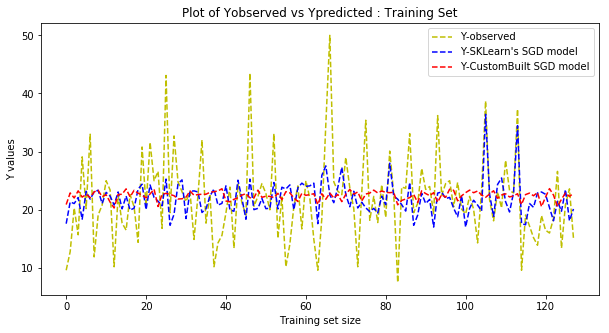

In [778]:
# PLOT  X-axis : No. of records | Y-axis : Yobservation;Ypred_SGD;Ypred_SKLearn
# Import the required modules.
import numpy as np
import math
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline  

# Set data to the plot.
t = np.arange(rowCount)                           # values for x-axis. Rows considered in the data matrix.
a = np.round(yObserved[0][:],2)                   # values for y-axis. Observed values of Y.
b = np.round(yhatSKLearn[0][:],2)                 # values for y-axis. Value of Y from SKLearn model.
c = np.round(yhatSGD[0][:],2)                     # values for y-axis. Value of Y from SGD model.

# Configure the plot.
plt.figure(figsize=(10,5))                                       # set the figure size.
plt.plot(t, a, 'y--',label="Y-observed")                         # plotting t, a separately 
plt.plot(t, b, 'b--',label="Y-SKLearn's SGD model")              # plotting t, b separately 
plt.plot(t, c, 'r--',label="Y-CustomBuilt SGD model")            # plotting t, c separately 
plt.title('Plot of Yobserved vs Ypredicted : Training Set')      # set the Title.
plt.xlabel("Training set size")                                  # set the xlabel.
plt.ylabel("Y values")                                           # set the ylabel.

# Display the plot.
plt.legend()                                                     # set the legend
plt.show()                                                       # display the plot.

#### Observation : 
    The SKLearn's SGD model performs better than the custom built SGD model.
    Comparison is made between Yhat values of SKlearn and Custom built SGD regressor,with Yobserved values of the datamatrix.

In [779]:
# Display the dataframe contents , sort by lowest value of gradient.
dfReport.sort_values(by='gradient_SGD',ascending=True).head(100)

,mse_SGD,mse_SKLearn,gradient_SGD,Yobserved,yhat_SGD,yhat_SKLearn,learningRate
0,599.447962,64.342003,-36.823506,"[[23.5], [28.5], [13.3], [24.6], [25.2], [23.3...","[[-1.32961476626923], [-1.5560397791850207], [...","[[22.446148465817856], [20.24745929009525], [2...",0.06
1,250.285699,58.387724,-21.496974,"[[19.4], [19.1], [24.2], [25.2], [23.1], [22.0...","[[8.54229732108462], [9.112627872375349], [8.0...","[[25.467243430426322], [21.986626980948586], [...",0.06
2,147.908596,60.280550,-12.756184,"[[13.6], [14.4], [29.1], [22.9], [17.2], [36.4...","[[14.946412701141217], [14.555179564603598], [...","[[25.876187527787664], [26.928257500130854], [...",0.06
3,92.577137,60.673861,-7.524275,"[[24.6], [28.7], [17.0], [23.3], [22.2], [23.5...","[[16.826432494344026], [17.060337313582394], [...","[[26.665979559354287], [21.170572804069927], [...",0.06
4,86.747753,61.644201,-4.155970,"[[36.4], [21.2], [36.4], [23.3], [33.4], [24.5...","[[19.832116294297755], [19.921574715402627], [...","[[26.439953108224778], [21.921579858627418], [...",0.06
65,93.017848,73.600199,-4.096409,"[[22.0], [21.7], [23.2], [31.6], [29.4], [18.5...","[[21.175248140760523], [22.22168887647429], [2...","[[29.601507841890772], [25.64635711005439], [2...",0.06
6,94.849705,74.715713,-3.795665,"[[26.6], [22.9], [23.9], [33.1], [44.0], [23.6...","[[19.619104118378054], [21.332454968226074], [...","[[25.396744245973043], [22.89702697637714], [2...",0.06
9,111.250322,76.413909,-3.313187,"[[21.6], [18.9], [24.8], [28.4], [19.3], [22.9...","[[21.976025298020158], [22.281094898049112], [...","[[26.43074958889602], [21.476561320905205], [2...",0.06
88,92.542500,75.175528,-3.310739,"[[17.4], [18.2], [12.8], [23.9], [23.1], [5.0]...","[[23.24600955113065], [22.50255809955779], [22...","[[26.23876031303361], [29.705348138761636], [2...",0.06
37,86.413848,74.850772,-3.104018,"[[25.3], [30.7], [14.1], [37.9], [14.5], [23.1...","[[20.73520023696473], [22.9671832573807], [22....","[[24.58491320778218], [26.42222106847295], [20...",0.06


#### Testset : Initialize the weights, intercept, iteration and learning rate.

In [780]:
# Iterations to be used during determining the optimal weights.
itrCount = 100   # initialize the iteration count to 100.

# Rows of data to be considered for SGD.
rowCount = 128 #  Initialize the row count to 128.

# Store weight values during each iteration for retrospective analysis.
wtTest = np.zeros(shape=((1,13)) )    # set its dimension to (100X13)
bInterceptTest = np.zeros(shape=(1,1))  # set its dimension to (100X1)

# Store the current weight values of input features, generated during each iteration.
wtFeaturesTest = wtLog[82]  # Get the optimal weights determined from the training phase.
wtFeaturesTest = wtFeaturesTest.reshape(1,13)  # set its dimension to (1X13)

# Store the intercept value.
bInterceptTest = bInterceptLog[82]  # Get the optimal intercept value, determined from the training phase.

# Store shuffleLog during each iteration for retro analysis.
shuffleLogTest = np.zeros(shape=(itrCount,rowCount),dtype=int)

# Import linear regression model.
from sklearn.linear_model import LinearRegression

# Store weight values during each iteration for retrospective analysis.
wtLogSKLearnTest = np.zeros(shape=((itrCount+1),13))     # set its dimension to (100X13)
bInterceptLogSKLearnTest = np.zeros(shape=((itrCount+1),1))  # set its dimension to (100X1)

# List to store the model metric values.
lstMSETest        = []
lstMSESKLearnTest = []
y_hat_SGDTest     = []
y_hat_SKLrnTest   = []
y_observedTest    = []


#### Test : Use the optimal weights and intercept determined during the training phase to compute error in test phase .

In [781]:
# Start the iteration and loop through one at a time.
for itr in np.arange(itrCount):
    # Shuffle the input features and the output variable.
    shuffleTest = np.random.randint(0,152,rowCount)

    W  = wtFeaturesTest                                       # Use the optimal weights determined in the training phase.
    W  = W.reshape(1,13)                                      # Reshape to the desired format.
    WT = W.T                                                  # Transpose the weight vector.
    XdotWT =  X_test_stdzd[shuffleTest].dot(WT)               # Compute dot product of data matrix and weight vector.
    Yshuffle = Y_test[shuffleTest]                            # The output values to consider.    
    XT = X_test_stdzd[shuffleTest].T                          # Transpose the data matrix.
    error = (XdotWT - Yshuffle + bInterceptTest)              # Error.

    # Calculate the mean squared error.
    mse = (1/rowCount) * ((Yshuffle -(XdotWT + bInterceptTest))**2).sum()
    lstMSETest.append(mse)                                 # Append MSE to the list.           
    y_hat_SGDTest.append(XdotWT + bInterceptTest)          # Append yhat from SGD algo to the list.

###########   SKLearn Implementation ##########################################################################################
    # Linear Regression
    lm = LinearRegression()                                         # Initialize the linear regression module.
    lm.fit(X_test_stdzd[shuffleTest], Yshuffle)                     # fit the model.
    
    # Predict the output
    y_hat = lm.predict(X_test_stdzd[shuffleTest])                   # predict the output. 
    mseSKLearn = (1/rowCount) * ((Yshuffle - y_hat)**2).sum()       # compute the mean squared error.
    lstMSESKLearnTest.append(mseSKLearn)                            # append the mse to the list.
    y_hat_SKLrnTest.append(y_hat)                                   # append yhat from sklearns model to the list.
    y_observedTest.append(Yshuffle)                                 # append yObserved from the data matrix to the list.


#### Test : Store the model metrics to a dataframe for analysis.

In [782]:
# Store the model metrics to a dataframe for analysis.
#dfReport_LR_0point05 ==> backup dataframe.

#del dfReport
import pandas as pd                                   # Import the pandas module

index = np.arange(itrCount)                           # get the index for the dataframe
dfReportTest = pd.DataFrame(index=index)              # create an empty dataframe

dfReportTest['mse_SGD']      = lstMSETest             # add column mse from SGD algorithm.
dfReportTest['mse_SKLearn']  = lstMSESKLearnTest      # add column mse from SKlearn algorithm.
dfReportTest['Yobserved']    = y_observedTest         # add column Y observed values.
dfReportTest['yhat_SGD']     = y_hat_SGDTest          # add column Yhat from SGD.
dfReportTest['yhat_SKLearn'] = y_hat_SKLrnTest        # add column Yhat from SKLearn
dfReportTest['learningRate'] = learningRate           # add column LearningRate.

# Display the dataframe contents , sort by lowest value of mean squared error.
dfReportTest.sort_values(by='mse_SGD',ascending=True).head()

,mse_SGD,mse_SKLearn,Yobserved,yhat_SGD,yhat_SKLearn,learningRate
85,63.057529,12.807036,"[[13.8], [19.6], [22.1], [25.1], [15.2], [10.5...","[[23.112017102187828], [23.194201317388035], [...","[[8.84533751764503], [18.83876375357142], [25....",0.06
66,66.675735,24.742760,"[[27.5], [17.4], [21.5], [22.2], [20.5], [22.4...","[[22.38541921675625], [23.530601280415304], [2...","[[20.069467027579144], [18.195342582467678], [...",0.06
7,67.503382,23.701714,"[[19.6], [14.2], [33.4], [26.4], [14.0], [17.9...","[[22.90310159081843], [22.721596128412155], [2...","[[18.341346000513678], [18.53575445051424], [3...",0.06
1,72.352774,16.946488,"[[22.4], [48.8], [21.0], [19.4], [23.4], [30.1...","[[22.209607386404674], [22.873571641011246], [...","[[23.59631335321968], [42.461357484130076], [2...",0.06
4,72.720723,21.891540,"[[17.8], [30.5], [41.3], [13.8], [20.4], [17.8...","[[23.269093289718235], [22.52340982045768], [2...","[[16.836325836738894], [28.698474219600854], [...",0.06


#### Plot the Yobserved vs Yhat values that has the lowest mean squared error.

In [783]:
# Get the minimum mean squared error.
dfMinMSETest = dfReportTest.sort_values(by='mse_SGD',ascending=True).head(2)   # Get the row that has the min(MSE).
dfMinMSETest = dfMinMSETest.sort_values(by='mse_SGD',ascending=False).head(1)  # Get the row that has the min(MSE).
minMSETest = float(dfMinMSETest['mse_SGD'])                                    # store it in a float varaible.
print(minMSETest)


# Narrowdown on the optimal lowest mean squared error and retrieve the Y values.
lstyhatSGDTest = list(dfReport['yhat_SGD'][dfReport['mse_SGD'] < minMSETest])         # yhat values from SGD algo.
lstyhatSKLearnTest = list(dfReport['yhat_SKLearn'][dfReport['mse_SGD'] < minMSETest]) # yhat values from SKLearn.
lstyObservedTest = list(dfReport['Yobserved'][dfReport['mse_SGD'] < minMSETest])      # yObserved values from data matrix.

66.67573536557649


In [784]:
# Get yhat from nonSKLearn SGD algorithm
yhatSGDTest = np.zeros(shape=(1,128))
yhatSGDTest = lstyhatSGDTest[0][:]
yhatSGDTest = yhatSGDTest.reshape(1,128)

# Get yhat from SKLearn SGD algorithm
yhatSKLearnTest = np.zeros(shape=(1,128))
yhatSKLearnTest = lstyhatSKLearnTest[0][:]
yhatSKLearnTest = yhatSKLearnTest.reshape(1,128)

# Get Yobserved from data matrix
yObservedTest = np.zeros(shape=(1,128))
yObservedTest = lstyObservedTest[0][:]
yObservedTest = yObservedTest.reshape(1,128)

#### Compare the Yobserved values against Yhat values of SGD model and SKLearn model.

In [785]:
import pandas as pd                                      # Import the pandas module

index = np.arange(rowCount)                              # get the index for the dataframe
dfYhatYobservedTest = pd.DataFrame(index=index)              # create an empty dataframe

dfYhatYobservedTest['Yobserved']    = yObservedTest[0][:]        # add column Y observed values.
dfYhatYobservedTest['yhat_SGD']     = yhatSGDTest[0][:]          # add column Yhat from SGD.
dfYhatYobservedTest['yhat_SKLearn'] = yhatSKLearnTest[0][:]      # add column Yhat from SKLearn

dfYhatYobservedTest.head()

,Yobserved,yhat_SGD,yhat_SKLearn
0,19.3,22.095861,23.267190
1,24.7,20.782049,22.423808
2,27.0,22.362854,27.141261
3,21.4,21.700381,20.498355
4,19.4,21.583178,17.636553


###### Observation : 
    The SGD model from SKLearn looks to perform better than the custom built SGD model.

#### Plot Predicted value of Y from SGD , Predicted value of Y from Sklearn against Observed value of Y from Data matrix.

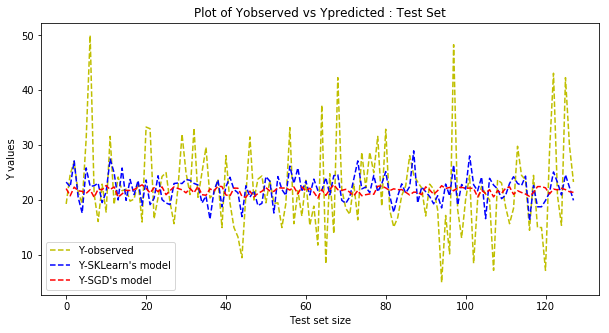

In [786]:
# PLOT  X-axis : No. of records | Y-axis : Yobservation;Ypred_SGD;Ypred_SKLearn
# Import the required modules.
import numpy as np
import math
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline  

# Set data to the plot.
t = np.arange(rowCount)                           # values for x-axis. Rows considered in the data matrix.
a = np.round(yObservedTest[0][:],2)                   # values for y-axis. Observed values of Y.
b = np.round(yhatSKLearnTest[0][:],2)                 # values for y-axis. Value of Y from SKLearn model.
c = np.round(yhatSGDTest[0][:],2)                     # values for y-axis. Value of Y from SGD model.

# Configure the plot.
plt.figure(figsize=(10,5))                                   # set the figure size.
plt.plot(t, a, 'y--',label="Y-observed")                     # plotting t, a separately 
plt.plot(t, b, 'b--',label="Y-SKLearn's model")              # plotting t, b separately 
plt.plot(t, c, 'r--',label="Y-SGD's model")                  # plotting t, c separately 
plt.title('Plot of Yobserved vs Ypredicted : Test Set')      # set the Title.
plt.xlabel("Test set size")                                  # set the xlabel.
plt.ylabel("Y values")                                       # set the ylabel.

# Display the plot.
plt.legend()                                                 # set the legend
plt.show()                                                   # display the plot.

#### Observation : 
    The SKLearn's SGD model performs better than the custom built SGD model.
    Comparison is made between Yhat values of SKlearn and Custom built SGD regressor,with Yobserved values of the datamatrix.

#### Plot the cost curve.

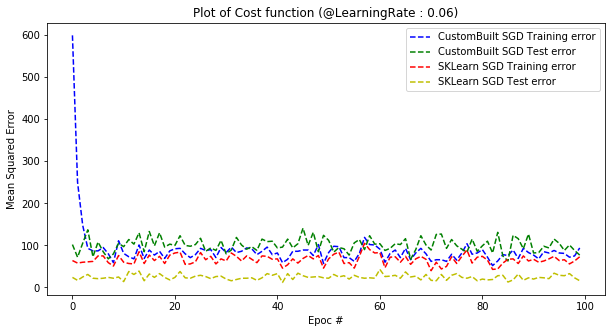

In [788]:
# Import the required modules.
import numpy as np
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline  

# Set data to the plot.
t = np.arange(itrCount)                                     # values for x-axis. Iterations.
a = np.round(dfReport['mse_SGD'])                           # values for y-axis. mean squared error of training set.
b = np.round(dfReportTest['mse_SGD'])                       # values for y-axis. mean squared error of test set.
c = np.round(dfReport['mse_SKLearn'])                       # values for y-axis. mean squared error of SKLearn training set.
d = np.round(dfReportTest['mse_SKLearn'])                   # values for y-axis. mean squared error of SKLearn test set.

# Configure the plot.
plt.figure(figsize=(10,5))                                  # set the figure size.
plt.plot(t,a,'b--',label="CustomBuilt SGD Training error")  # plotting t, a separately. 
plt.plot(t,b,'g--',label="CustomBuilt SGD Test error")      # plotting t, b separately.
plt.plot(t,c,'r--',label="SKLearn SGD Training error")      # plotting t, c separately. 
plt.plot(t,d,'y--',label="SKLearn SGD Test error")          # plotting t, d separately.

plt.title('Plot of Cost function (@LearningRate : 0.06)')  # set the Title.
plt.xlabel("Epoc #")                                        # set the xlabel.
plt.ylabel("Mean Squared Error")                            # set the ylabel.

# Display the plot.
plt.legend()                                                # set the legend.
plt.show()                                                  # display the plot.

### Conclusion : 
###### Custom Built SGD Regressor :
    TRAINING PHASE :
        The custom built SGD regressor performs as expected during the training phase. 
        Since the curve is L shaped, we infer that the model is optimizing well.
    TEST PHASE :
        The custom build SGD regressor has a constant error, which confirms that the model is behaving as expected.
###### SKLearn SGD Regressor :
    TRAIN/TEST PHASE :
        The SKLearn's SGD regressor has a constant error, which confirms that the model is behaving as expected.

#### Reason to choose 0.06 as our optimal learning rate.

We took the following learning rate, one at a time, and ran the above code, to compute the training and testing errors.
We plotted the training and testing errors against the Learning rate to decide on the optimal learning rate.

#### The training and testing error for varying values of Learning Rate is tabulated below :

In [789]:
# Load the prettytable
from prettytable import PrettyTable

# Instantiate the prettytable module.
x = PrettyTable()
# Set the column names for the table.
x.field_names = ["SL#","Learning Rate","Optimal Training Mean-Squared-Error", "Optimal Testing Mean-Squared-Error"]

# Add the classification metrics to the table.
x.add_row(['01','00.02','48.53','52.71'])
x.add_row(['02','00.03','52.87','51.26'])
x.add_row(['03','00.04','52.48','64.60'])
x.add_row(['04','00.05','53.24','52.86'])
x.add_row(['05','00.06','42.71','51.28'])
x.add_row(['06','00.07','51.08','63.05'])
x.add_row(['07','00.08','53.76','64.34'])
x.add_row(['08','00.09','43.51','52.49'])
x.add_row(['09','00.10','53.52','61.79'])

# Apply data alignment.
x.align["SL#"] = "l"
x.align["Learning Rate"] = "c"
x.align["Optimal Training Mean-Squared-Error"] = "c"
x.align["Optimal Testing Mean-Squared-Error"] = "c"


# Print the table.
print("Metrics to choose the Optimal Learning Rate :")
print(x)

Metrics to choose the Optimal Learning Rate :
+-----+---------------+-------------------------------------+------------------------------------+
| SL# | Learning Rate | Optimal Training Mean-Squared-Error | Optimal Testing Mean-Squared-Error |
+-----+---------------+-------------------------------------+------------------------------------+
| 01  |     00.02     |                48.53                |               52.71                |
| 02  |     00.03     |                52.87                |               51.26                |
| 03  |     00.04     |                52.48                |               64.60                |
| 04  |     00.05     |                53.24                |               52.86                |
| 05  |     00.06     |                42.71                |               51.28                |
| 06  |     00.07     |                51.08                |               63.05                |
| 07  |     00.08     |                53.76                |  

#### PLOT OF Training Error vs Test Error :

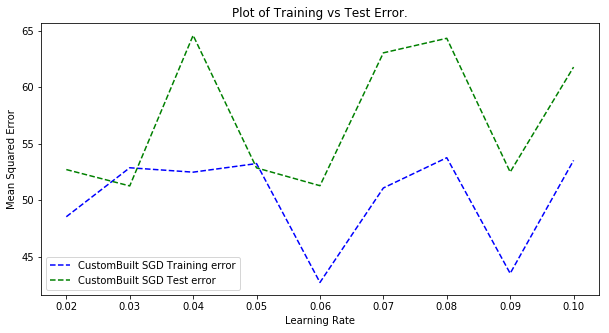

In [790]:
# Import the modules.
import numpy as np
import matplotlib.pyplot as plt
# plot inline
%matplotlib inline

# Set the data for x and y axis of the plot.
lstLearningRate = np.arange(0.02,0.11,0.01)                               # Learning Rate
mseTraining = [48.53,52.87,52.48,53.24,42.71,51.08,53.76,43.51,53.52]     # mse of training
mseTesting  = [52.71,51.26,64.60,52.86,51.28,63.05,64.34,52.49,61.79]     # mse of testing

# Set data to the plot.
t = lstLearningRate             # values for x-axis. learning rate.
a = mseTraining                 # values for y-axis. mean squared error of training set.
b = mseTesting                  # values for y-axis. mean squared error of test set.

# Configure the plot.
plt.figure(figsize=(10,5))                                  # set the figure size.
plt.plot(t,a,'b--',label="CustomBuilt SGD Training error")  # plotting t, a separately. 
plt.plot(t,b,'g--',label="CustomBuilt SGD Test error")      # plotting t, b separately.


plt.title('Plot of Training vs Test Error.')  # set the Title.
plt.xlabel("Learning Rate")                   # set the xlabel.
plt.ylabel("Mean Squared Error")              # set the ylabel.

# Display the plot.
plt.legend()                                   # set the legend.
plt.show()                                     # display the plot.

#### Based on the above learning curves, at learning rate 0.06 both the training error and testing error are low.
#### We choose 0.06 as our optimal learning rate.